In [1]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
palette = {'all_kfold': 'tab:blue', 'ts': 'tab:orange', 'all_nested': 'tab:green', 'fs_nested_pt_kfold': 'tab:red', 'fs_kfold_pt_nested': 'tab:purple'}

In [3]:
path = os.getcwd()
data_files = glob.glob(os.path.join(path, "binary_subgroups/binary*"))

li = []
for filename in data_files:
    df = pd.read_csv(filename)
    li.append(df)


subgroup_df = pd.concat(li, axis=0, ignore_index=True)

new_names = dict([(i,'metric_'+ i) for i in subgroup_df.iloc[0:1,10:].columns.values])
subgroup_df.rename(columns=new_names, inplace=True)


subgroup_df = subgroup_df[subgroup_df['metric_accuracy'].notna()]
subgroup_df

,subgroup,model,main_metric,sample_size,feature_selector,feature_selection_frac,validation_type,train_size,cv_split_size,par_split_size,metric_accuracy,metric_balanced_accuracy,metric_f1,metric_precision,metric_recall
0,young,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.250000,0.250000,0.200000,0.166667,0.250000
1,young,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.250000,0.166667,0.300000,0.375000,0.250000
2,young,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.250000,0.250000,0.200000,0.166667,0.250000
3,young,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.250000,0.500000,0.100000,0.062500,0.250000
4,young,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.750000,0.750000,0.733333,0.833333,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383341,elder,svm,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.699176,0.500000,0.576853,0.492371,0.699176
383342,elder,svm,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.699176,0.500000,0.576853,0.492371,0.699176
383343,elder,svm,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.699176,0.500000,0.576853,0.492371,0.699176
383344,elder,svm,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.699176,0.500000,0.576853,0.492371,0.699176


In [4]:
selection = subgroup_df[
    (subgroup_df['feature_selection_frac'] == 1.0)
    & (subgroup_df['main_metric'] == 'accuracy')
    & ((subgroup_df['train_size'] == 0.8) | subgroup_df['train_size'].isna())
    & ((subgroup_df['cv_split_size'] == 13.0) | subgroup_df['cv_split_size'].isna())]

In [5]:
selection = selection.reset_index()

In [6]:
pivoted_subgroup = pd.wide_to_long(selection, stubnames='metric', i='index', j='metric_type', sep='_', suffix=r'\w+')
pivoted_subgroup.reset_index(inplace=True)
pivoted_subgroup = pivoted_subgroup.drop('index', axis=1)
pivoted_subgroup.rename(columns={'metric': 'metric_measurement'}, inplace=True)
pivoted_subgroup

,metric_type,sample_size,cv_split_size,train_size,par_split_size,subgroup,main_metric,feature_selector,validation_type,feature_selection_frac,model,metric_measurement
0,accuracy,0.03,NaN,0.8,2,young,accuracy,rfe,ts,0.7,logistic_regression,0.500000
1,accuracy,0.03,NaN,0.8,2,young,accuracy,rfe,ts,0.7,logistic_regression,1.000000
2,accuracy,0.03,NaN,0.8,2,young,accuracy,rfe,ts,0.7,logistic_regression,0.000000
3,accuracy,0.03,NaN,0.8,2,young,accuracy,rfe,ts,0.7,logistic_regression,1.000000
4,accuracy,0.03,NaN,0.8,2,young,accuracy,rfe,ts,0.7,logistic_regression,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
161495,recall,1.00,13.0,NaN,13,elder,accuracy,rfe,fs_kfold_pt_nested,0.7,svm,0.776099
161496,recall,1.00,13.0,NaN,13,elder,accuracy,rfe,fs_kfold_pt_nested,0.7,svm,0.796703
161497,recall,1.00,13.0,NaN,13,elder,accuracy,rfe,fs_kfold_pt_nested,0.7,svm,0.787088
161498,recall,1.00,13.0,NaN,13,elder,accuracy,rfe,fs_kfold_pt_nested,0.7,svm,0.806319


In [7]:
gf = pivoted_subgroup['subgroup'].replace({'young': 291, 'middle': 524, 'elder': 103})
r = pivoted_subgroup['sample_size'] * gf
pivoted_subgroup['sample_size'] = r
pivoted_subgroup

,metric_type,sample_size,cv_split_size,train_size,par_split_size,subgroup,main_metric,feature_selector,validation_type,feature_selection_frac,model,metric_measurement
0,accuracy,8.73,NaN,0.8,2,young,accuracy,rfe,ts,0.7,logistic_regression,0.500000
1,accuracy,8.73,NaN,0.8,2,young,accuracy,rfe,ts,0.7,logistic_regression,1.000000
2,accuracy,8.73,NaN,0.8,2,young,accuracy,rfe,ts,0.7,logistic_regression,0.000000
3,accuracy,8.73,NaN,0.8,2,young,accuracy,rfe,ts,0.7,logistic_regression,1.000000
4,accuracy,8.73,NaN,0.8,2,young,accuracy,rfe,ts,0.7,logistic_regression,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
161495,recall,103.00,13.0,NaN,13,elder,accuracy,rfe,fs_kfold_pt_nested,0.7,svm,0.776099
161496,recall,103.00,13.0,NaN,13,elder,accuracy,rfe,fs_kfold_pt_nested,0.7,svm,0.796703
161497,recall,103.00,13.0,NaN,13,elder,accuracy,rfe,fs_kfold_pt_nested,0.7,svm,0.787088
161498,recall,103.00,13.0,NaN,13,elder,accuracy,rfe,fs_kfold_pt_nested,0.7,svm,0.806319


In [8]:
accuracy_subgroups = pivoted_subgroup[pivoted_subgroup['metric_type'] == 'accuracy']

In [9]:
accuracy_subgroups_lr = accuracy_subgroups[accuracy_subgroups['model'] == 'logistic_regression']
accuracy_subgroups_lr

,metric_type,sample_size,cv_split_size,train_size,par_split_size,subgroup,main_metric,feature_selector,validation_type,feature_selection_frac,model,metric_measurement
0,accuracy,8.73,NaN,0.8,2,young,accuracy,rfe,ts,0.7,logistic_regression,0.500000
1,accuracy,8.73,NaN,0.8,2,young,accuracy,rfe,ts,0.7,logistic_regression,1.000000
2,accuracy,8.73,NaN,0.8,2,young,accuracy,rfe,ts,0.7,logistic_regression,0.000000
3,accuracy,8.73,NaN,0.8,2,young,accuracy,rfe,ts,0.7,logistic_regression,1.000000
4,accuracy,8.73,NaN,0.8,2,young,accuracy,rfe,ts,0.7,logistic_regression,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
16145,accuracy,103.00,13.0,NaN,13,elder,accuracy,rfe,fs_kfold_pt_nested,0.7,logistic_regression,0.817308
16146,accuracy,103.00,13.0,NaN,13,elder,accuracy,rfe,fs_kfold_pt_nested,0.7,logistic_regression,0.824176
16147,accuracy,103.00,13.0,NaN,13,elder,accuracy,rfe,fs_kfold_pt_nested,0.7,logistic_regression,0.804945
16148,accuracy,103.00,13.0,NaN,13,elder,accuracy,rfe,fs_kfold_pt_nested,0.7,logistic_regression,0.795330


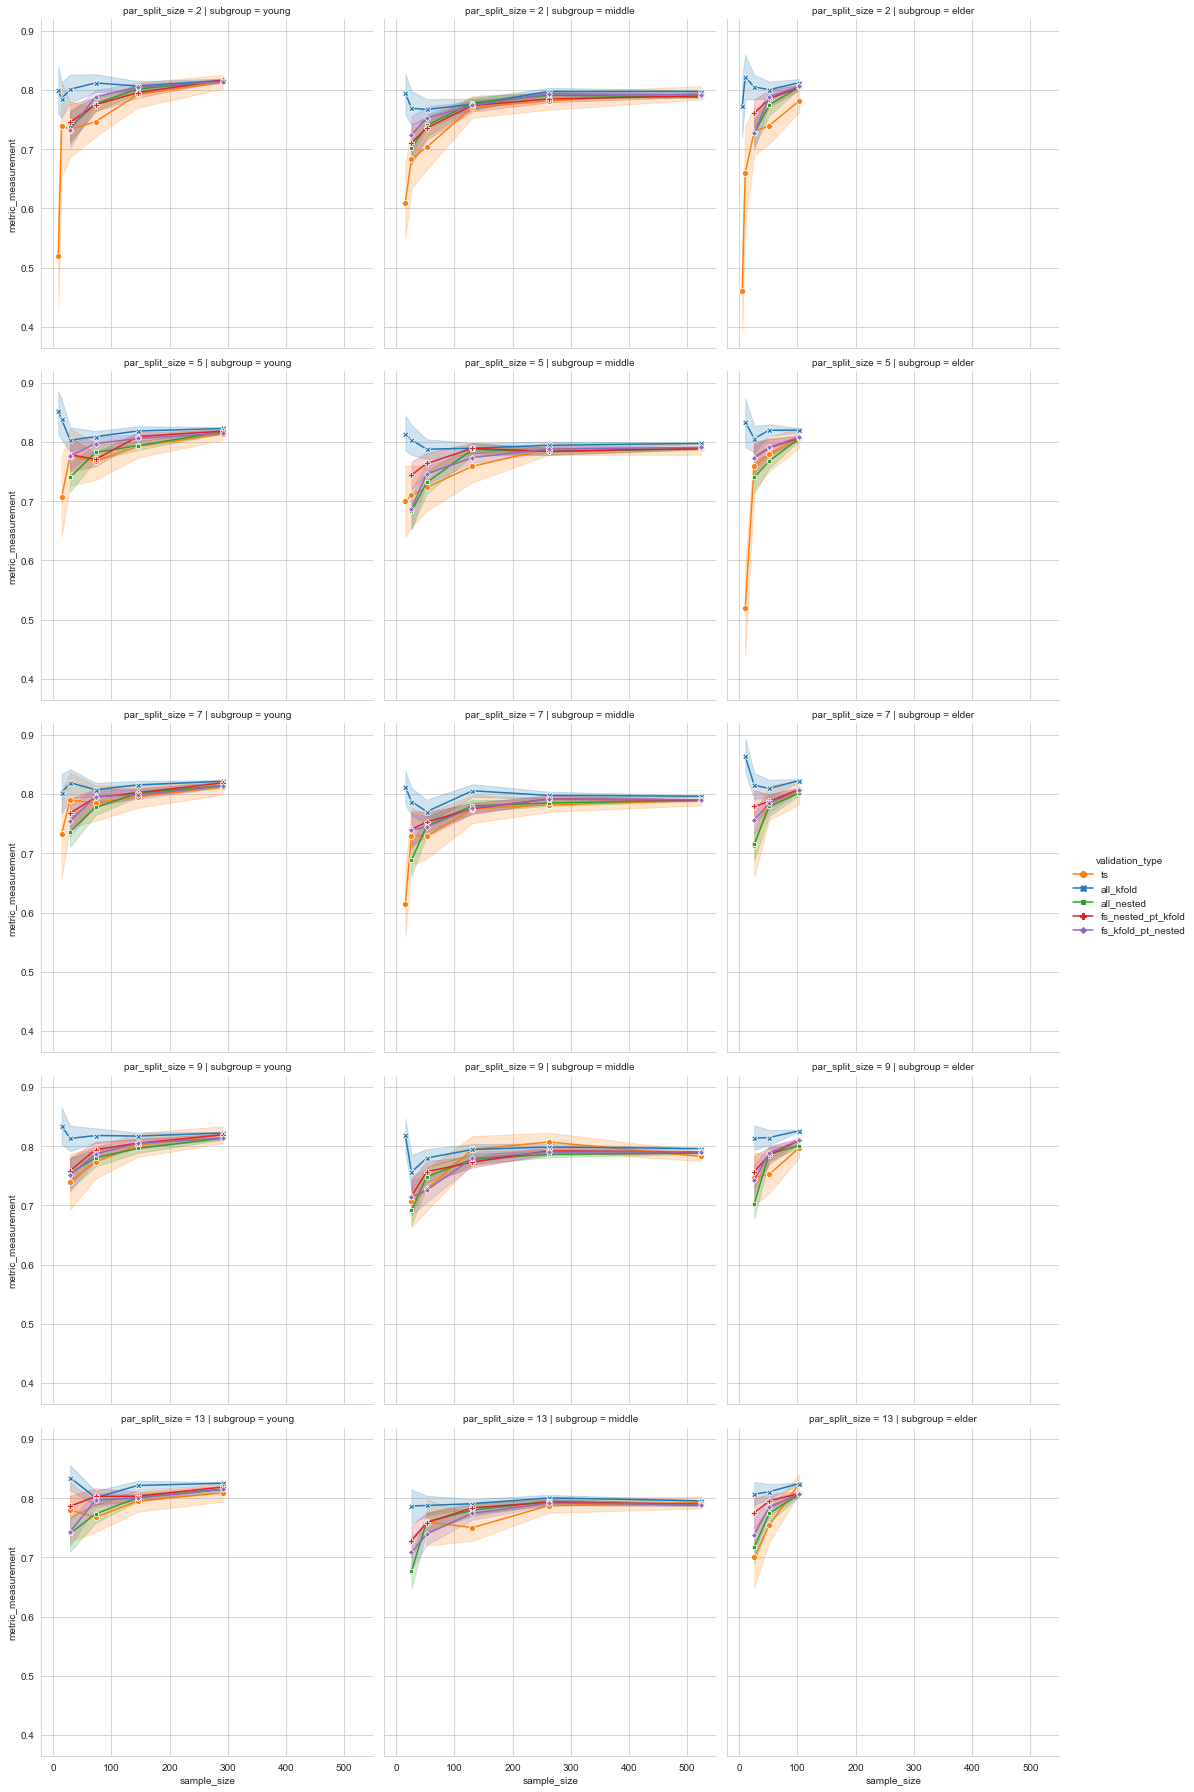

In [10]:
sns.relplot(x='sample_size', data=accuracy_subgroups_lr, hue='validation_type', kind='line', y='metric_measurement',  ci=95, row='par_split_size', col='subgroup', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()

In [11]:
accuracy_subgroups_svm = accuracy_subgroups[accuracy_subgroups['model'] == 'svm']
accuracy_subgroups_svm

,metric_type,sample_size,cv_split_size,train_size,par_split_size,subgroup,main_metric,feature_selector,validation_type,feature_selection_frac,model,metric_measurement
16150,accuracy,8.73,NaN,0.8,2,young,accuracy,rfe,ts,0.7,svm,0.500000
16151,accuracy,8.73,NaN,0.8,2,young,accuracy,rfe,ts,0.7,svm,0.500000
16152,accuracy,8.73,NaN,0.8,2,young,accuracy,rfe,ts,0.7,svm,0.500000
16153,accuracy,8.73,NaN,0.8,2,young,accuracy,rfe,ts,0.7,svm,0.500000
16154,accuracy,8.73,NaN,0.8,2,young,accuracy,rfe,ts,0.7,svm,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
32295,accuracy,103.00,13.0,NaN,13,elder,accuracy,rfe,fs_kfold_pt_nested,0.7,svm,0.776099
32296,accuracy,103.00,13.0,NaN,13,elder,accuracy,rfe,fs_kfold_pt_nested,0.7,svm,0.796703
32297,accuracy,103.00,13.0,NaN,13,elder,accuracy,rfe,fs_kfold_pt_nested,0.7,svm,0.787088
32298,accuracy,103.00,13.0,NaN,13,elder,accuracy,rfe,fs_kfold_pt_nested,0.7,svm,0.806319


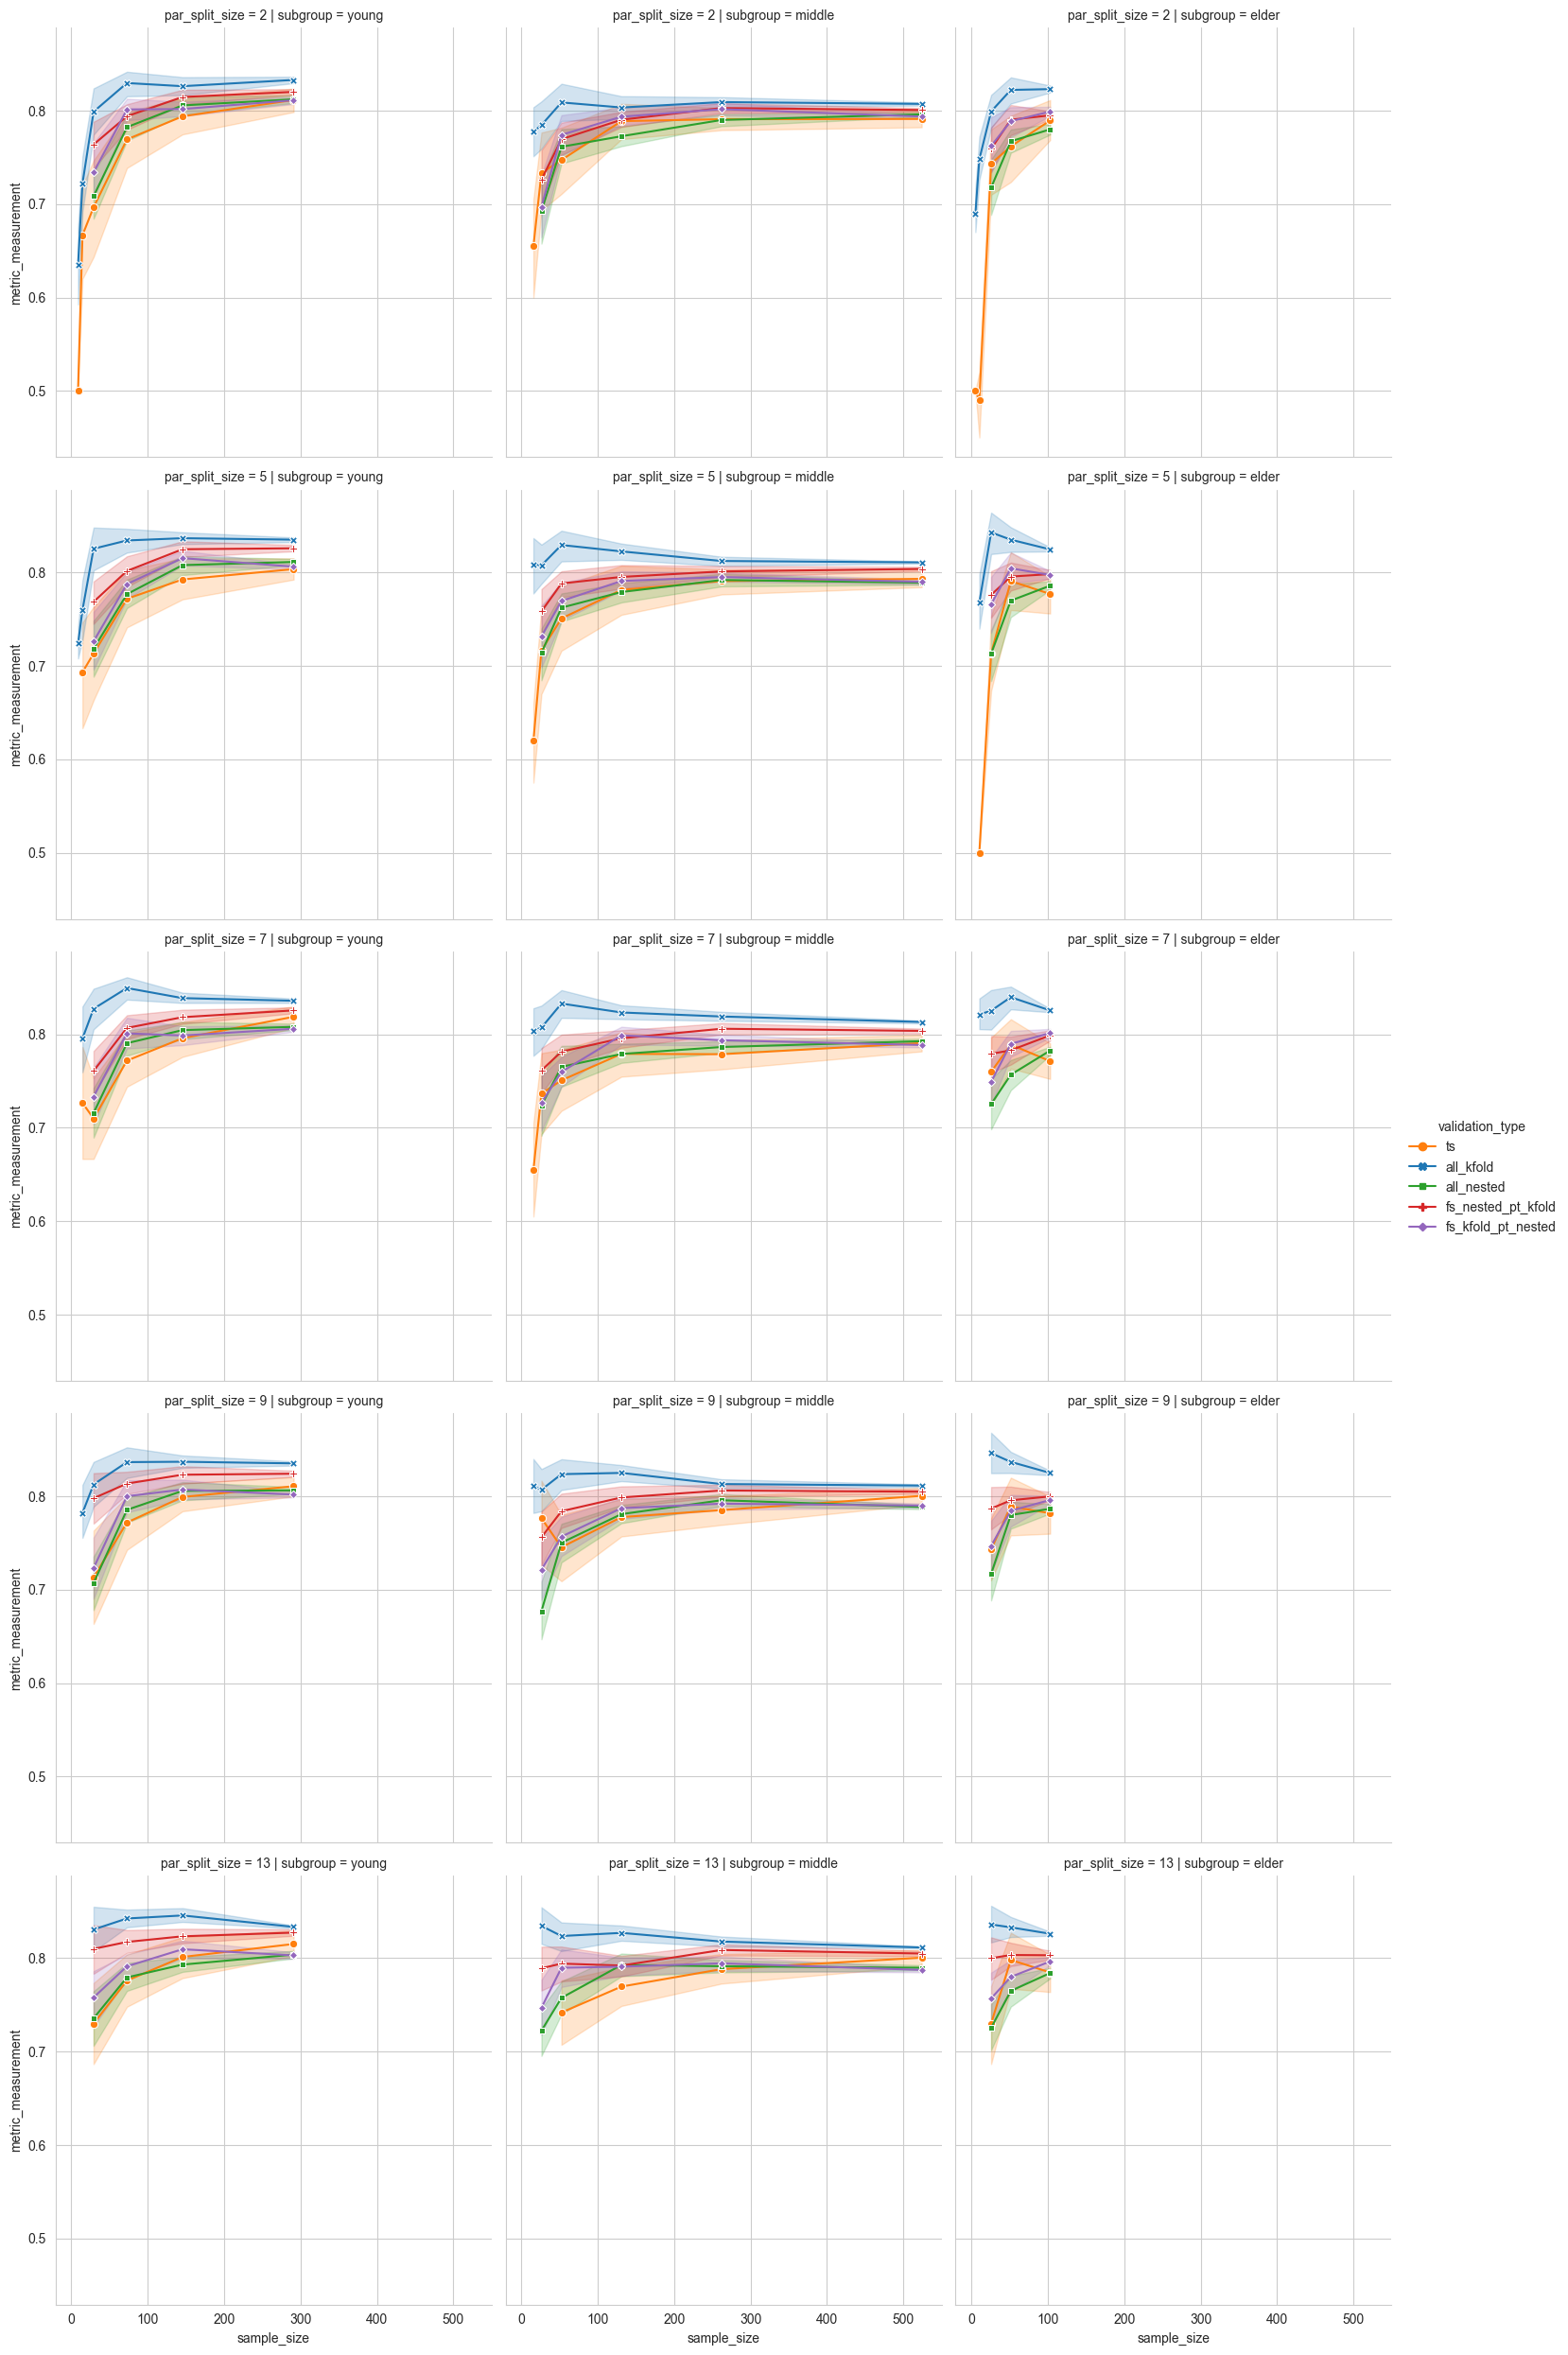

In [12]:
sns.relplot(x='sample_size', data=accuracy_subgroups_svm, hue='validation_type', kind='line', y='metric_measurement',  ci=95, row='par_split_size', col='subgroup', palette=palette, style='validation_type', markers=True, dashes=False)
plt.show()